<a href="https://colab.research.google.com/github/Raquelreyes/BBDD/blob/main/Set_de_datos_de_casasArbol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd

datos = pd.read_csv('U4_01_housing.csv')


In [9]:
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
datos.value_counts('ocean_proximity')

# 1, 2, 3, 4, 5

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
dtype: int64

In [11]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:

#muestra información interesante, en relación a los datos (medias, %, etc)
datos_na=datos.dropna()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

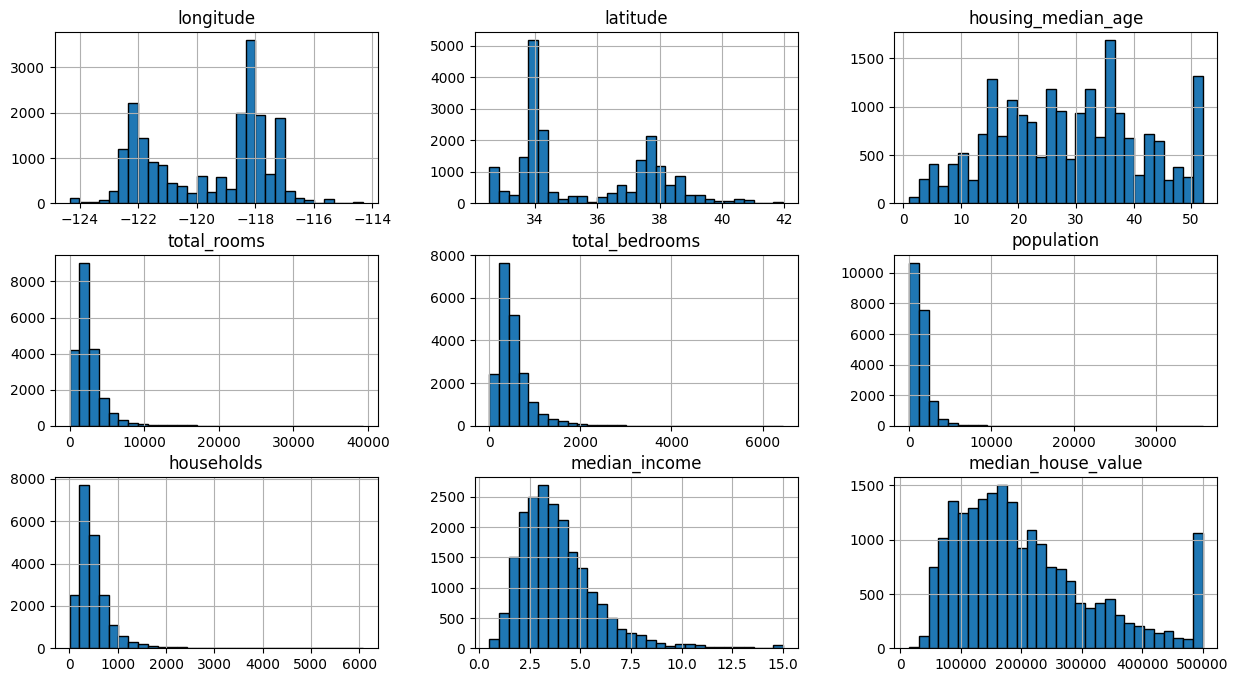

In [13]:
# figsize: dimensiones de las figuras
# bins: cambiar el # de columnas en el histograma
# edgecolor: aplica un color al borde

datos.hist( figsize=(15,8), bins=30, edgecolor = 'black' ) # represanta la informacion en histogramas

In [14]:
datos_na = datos.dropna() # eliminar los registros nulos

In [15]:
datos_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


<Axes: xlabel='latitude', ylabel='longitude'>

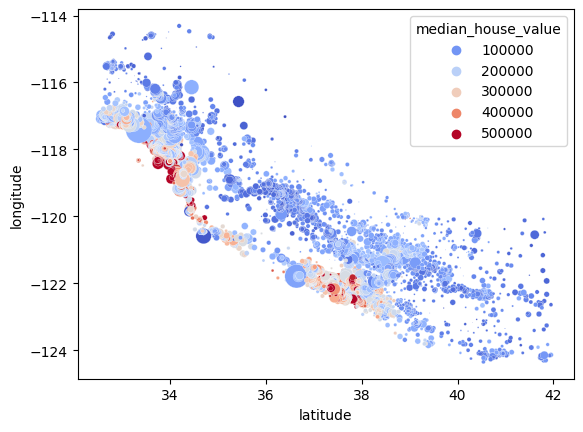

In [16]:
# graficar los datos
import seaborn as sb

sb.scatterplot(x='latitude', y='longitude', data=datos_na, hue='median_house_value', s=datos_na['population']/100, palette='coolwarm')

<Axes: xlabel='latitude', ylabel='longitude'>

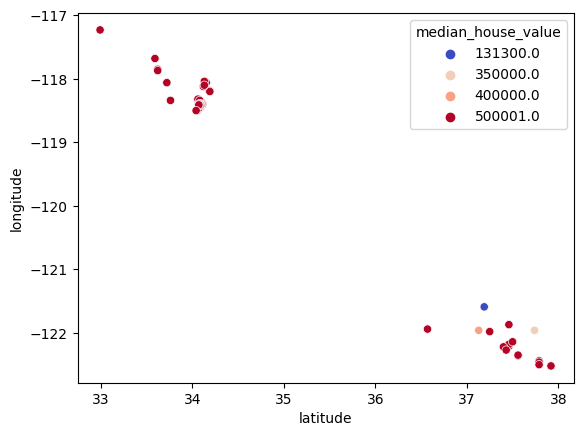

In [17]:
sb.scatterplot(x='latitude', y='longitude', data=datos_na[datos_na.median_income > 14], hue='median_house_value', palette='coolwarm')

In [19]:
# Dummies

# 1, 2, 3, 4, 5
#   NEAR BAY    INLAND    ISLAND
#       1         0          0
#       0         0          1

dummies = pd.get_dummies(datos_na['ocean_proximity'], dtype=int)


In [20]:
#union de los dummies al dataframe
datos_na = datos_na.join(dummies)

In [21]:
#eliminar la columna que no necesito
datos_na = datos_na.drop(['ocean_proximity'], axis=1)

In [22]:
datos_na.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.003777,0.026477,-0.007603,-0.023647,-0.008674
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,0.073450,-0.019602,-0.010451,-0.061480,-0.023498
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,0.041883,-0.038265,-0.009119,-0.011280,0.002106
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378
<1H OCEAN,0.320831,-0.446928,0.045553,-0.003777,0.018314,0.073450,0.041883,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018


<Axes: >

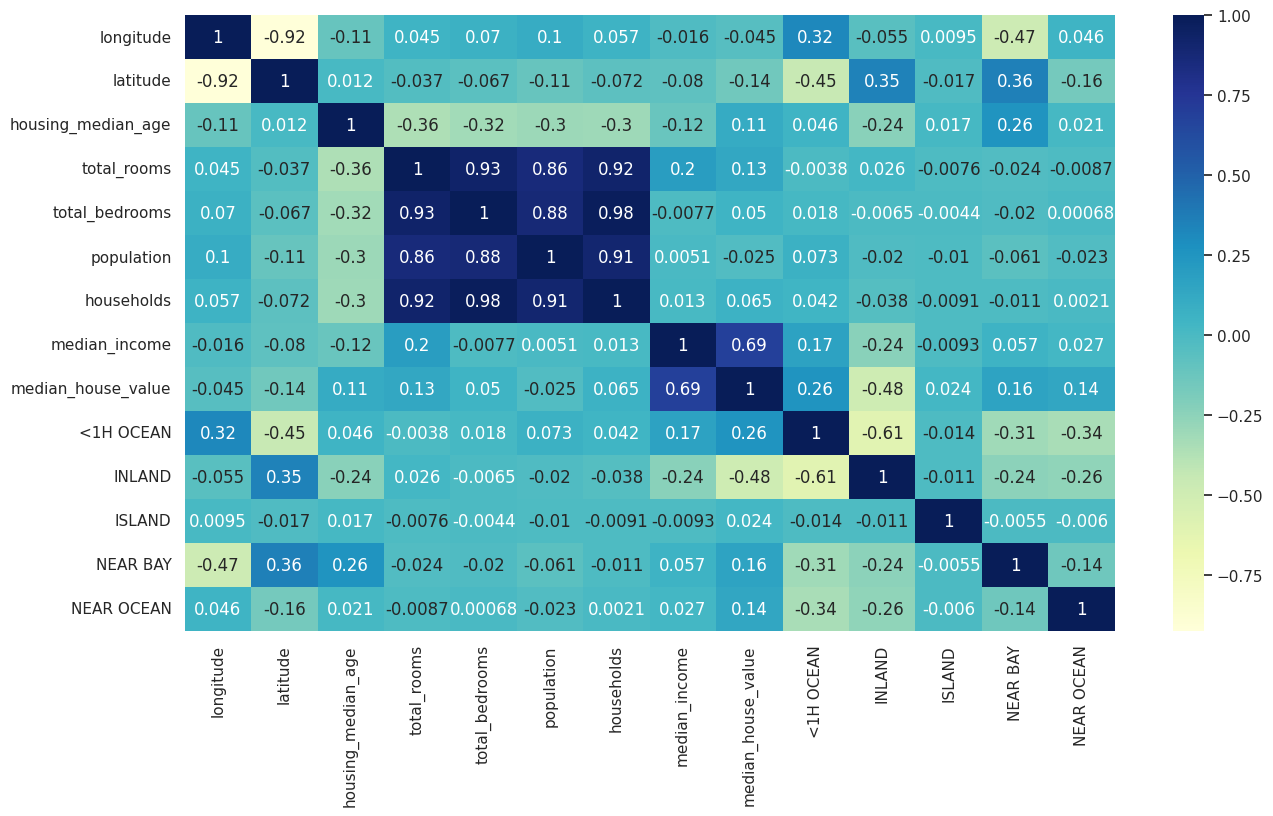

In [23]:
#diagrama de correlaciones

sb.set(rc={'figure.figsize':(15,8)})
sb.heatmap(data=datos_na.corr(), annot=True, cmap='YlGnBu' )

In [24]:
#valores correlacionados del median_house_value

datos.corr()['median_house_value'].sort_values(ascending=False)

<ipython-input-24-4a987637d184>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datos.corr()['median_house_value'].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<Axes: xlabel='median_house_value', ylabel='median_income'>

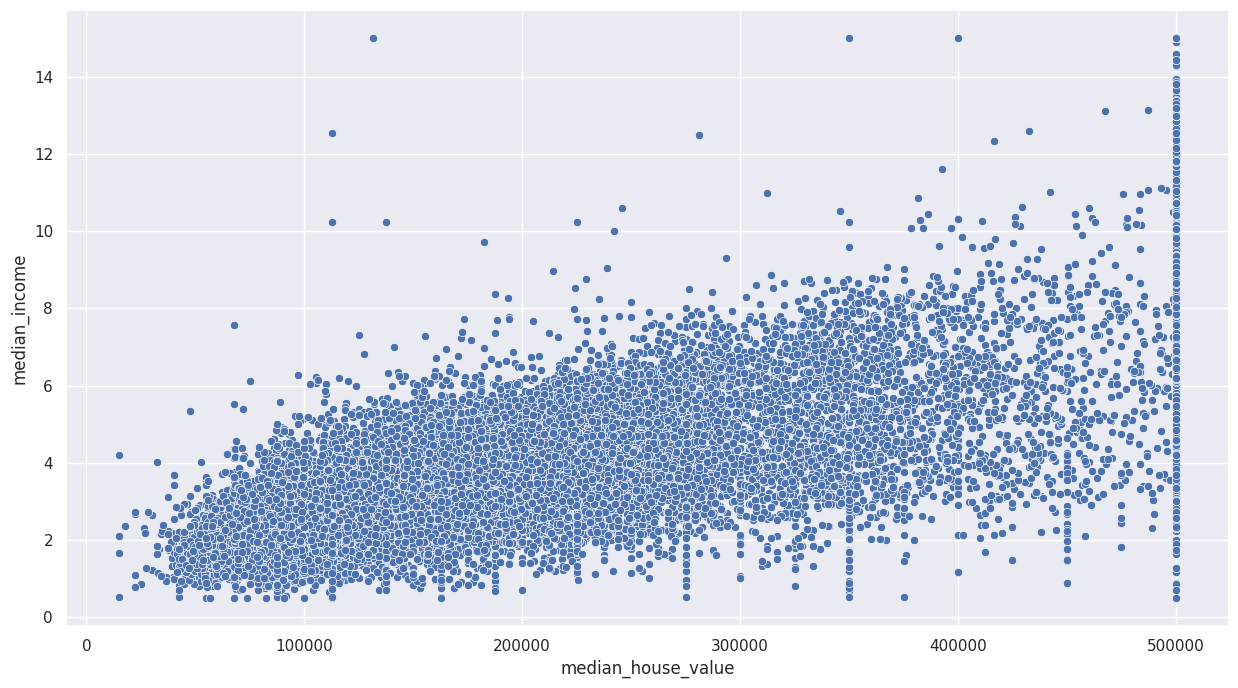

In [25]:
# grafica de relacion entre el valor de la casa y los ingresos

sb.scatterplot(x=datos_na['median_house_value'], y=datos_na['median_income'])

In [26]:
#agregar caracteristica de ratio de habitaciones de dormir

datos_na['room_ratio'] = datos_na['total_bedrooms'] /  datos_na['total_rooms']

<Axes: >

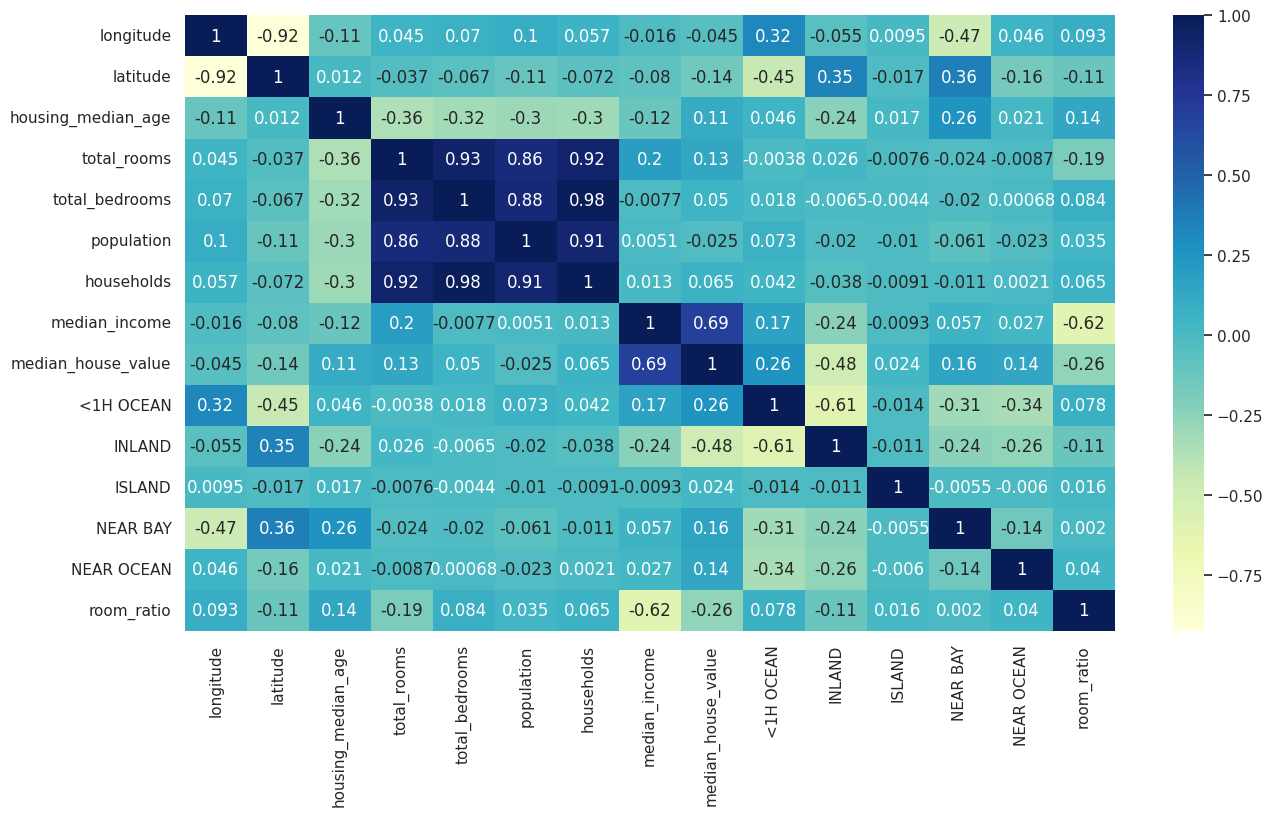

In [27]:

sb.set(rc={'figure.figsize':(15,8)})
sb.heatmap(data=datos_na.corr(), annot=True, cmap='YlGnBu' )

In [28]:
# separar las caracteristicas

#caracteristicas de entrada???
X = datos_na.drop(['median_house_value'], axis=1) #eliminar una columna

#la etiqueta de salida o resultado
y = datos_na['median_house_value']

In [55]:
# separar el conjunto de caracteristicas en datos de prueba y entrenamiento

from sklearn.model_selection import train_test_split

# IMPORTANTE!!

# primero son las caracteristicas de entrada para entrenamiento y prueba
# luego etiquetas de salida para entrenamiento y prueba

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=.3)

In [68]:
from sklearn.tree import DecisionTreeRegressor

modelo = DecisionTreeRegressor(max_depth = 5) # un nivel de profundiad

modelo.fit(X_train,y_train)

predicciones = modelo.predict(X_test)

In [69]:
#entrenar el modelo
#from sklearn.linear_model import LinearRegression

#modelo = LinearRegression()

#modelo.fit(X_train, y_train) # ocurre el entrenamiento

In [70]:
# reralizar las predicciones

#predicciones = modelo.predict(X_test)


In [71]:


comparativa = { 'predicciones': predicciones, 'Valor original': y_test }

pd.DataFrame(comparativa)

,predicciones,Valor original
5537,400904.173333,500001.0
19408,102357.835498,170200.0
19804,102357.835498,64500.0
7859,213773.680344,225800.0
5168,134070.259881,93600.0
...,...,...
6479,213773.680344,173300.0
9907,205125.988147,153200.0
10904,167922.282493,123200.0
53,134070.259881,104200.0


In [73]:
print(modelo.score(X_train, y_train))

print(modelo.score(X_test, y_test))

0.6402113337453936
0.6361177298511262


[Text(0.5, 0.9166666666666666, 'median_income <= 5.086\n13348225773.598\n14303\n206966.67'),
 Text(0.25, 0.75, 'INLAND <= 0.5\n8362655753.299\n11381\n174209.898'),
 Text(0.125, 0.5833333333333334, 'median_income <= 3.106\n8156481757.396\n7311\n208287.929'),
 Text(0.0625, 0.4166666666666667, 'median_income <= 2.328\n6201341916.69\n3134\n171159.359'),
 Text(0.03125, 0.25, 'room_ratio <= 0.309\n5542138655.205\n1452\n151131.621'),
 Text(0.015625, 0.08333333333333333, '3402195346.161\n1012\n134070.26'),
 Text(0.046875, 0.08333333333333333, '8254634783.041\n440\n190372.752'),
 Text(0.09375, 0.25, 'longitude <= -118.285\n6125229570.068\n1682\n188448.465'),
 Text(0.078125, 0.08333333333333333, '8304796648.557\n928\n205125.988'),
 Text(0.109375, 0.08333333333333333, '2679035424.181\n754\n167922.282'),
 Text(0.1875, 0.4166666666666667, 'longitude <= -118.275\n7813068707.953\n4177\n236145.468'),
 Text(0.15625, 0.25, 'latitude <= 37.935\n8635592377.219\n2401\n257771.798'),
 Text(0.140625, 0.083333

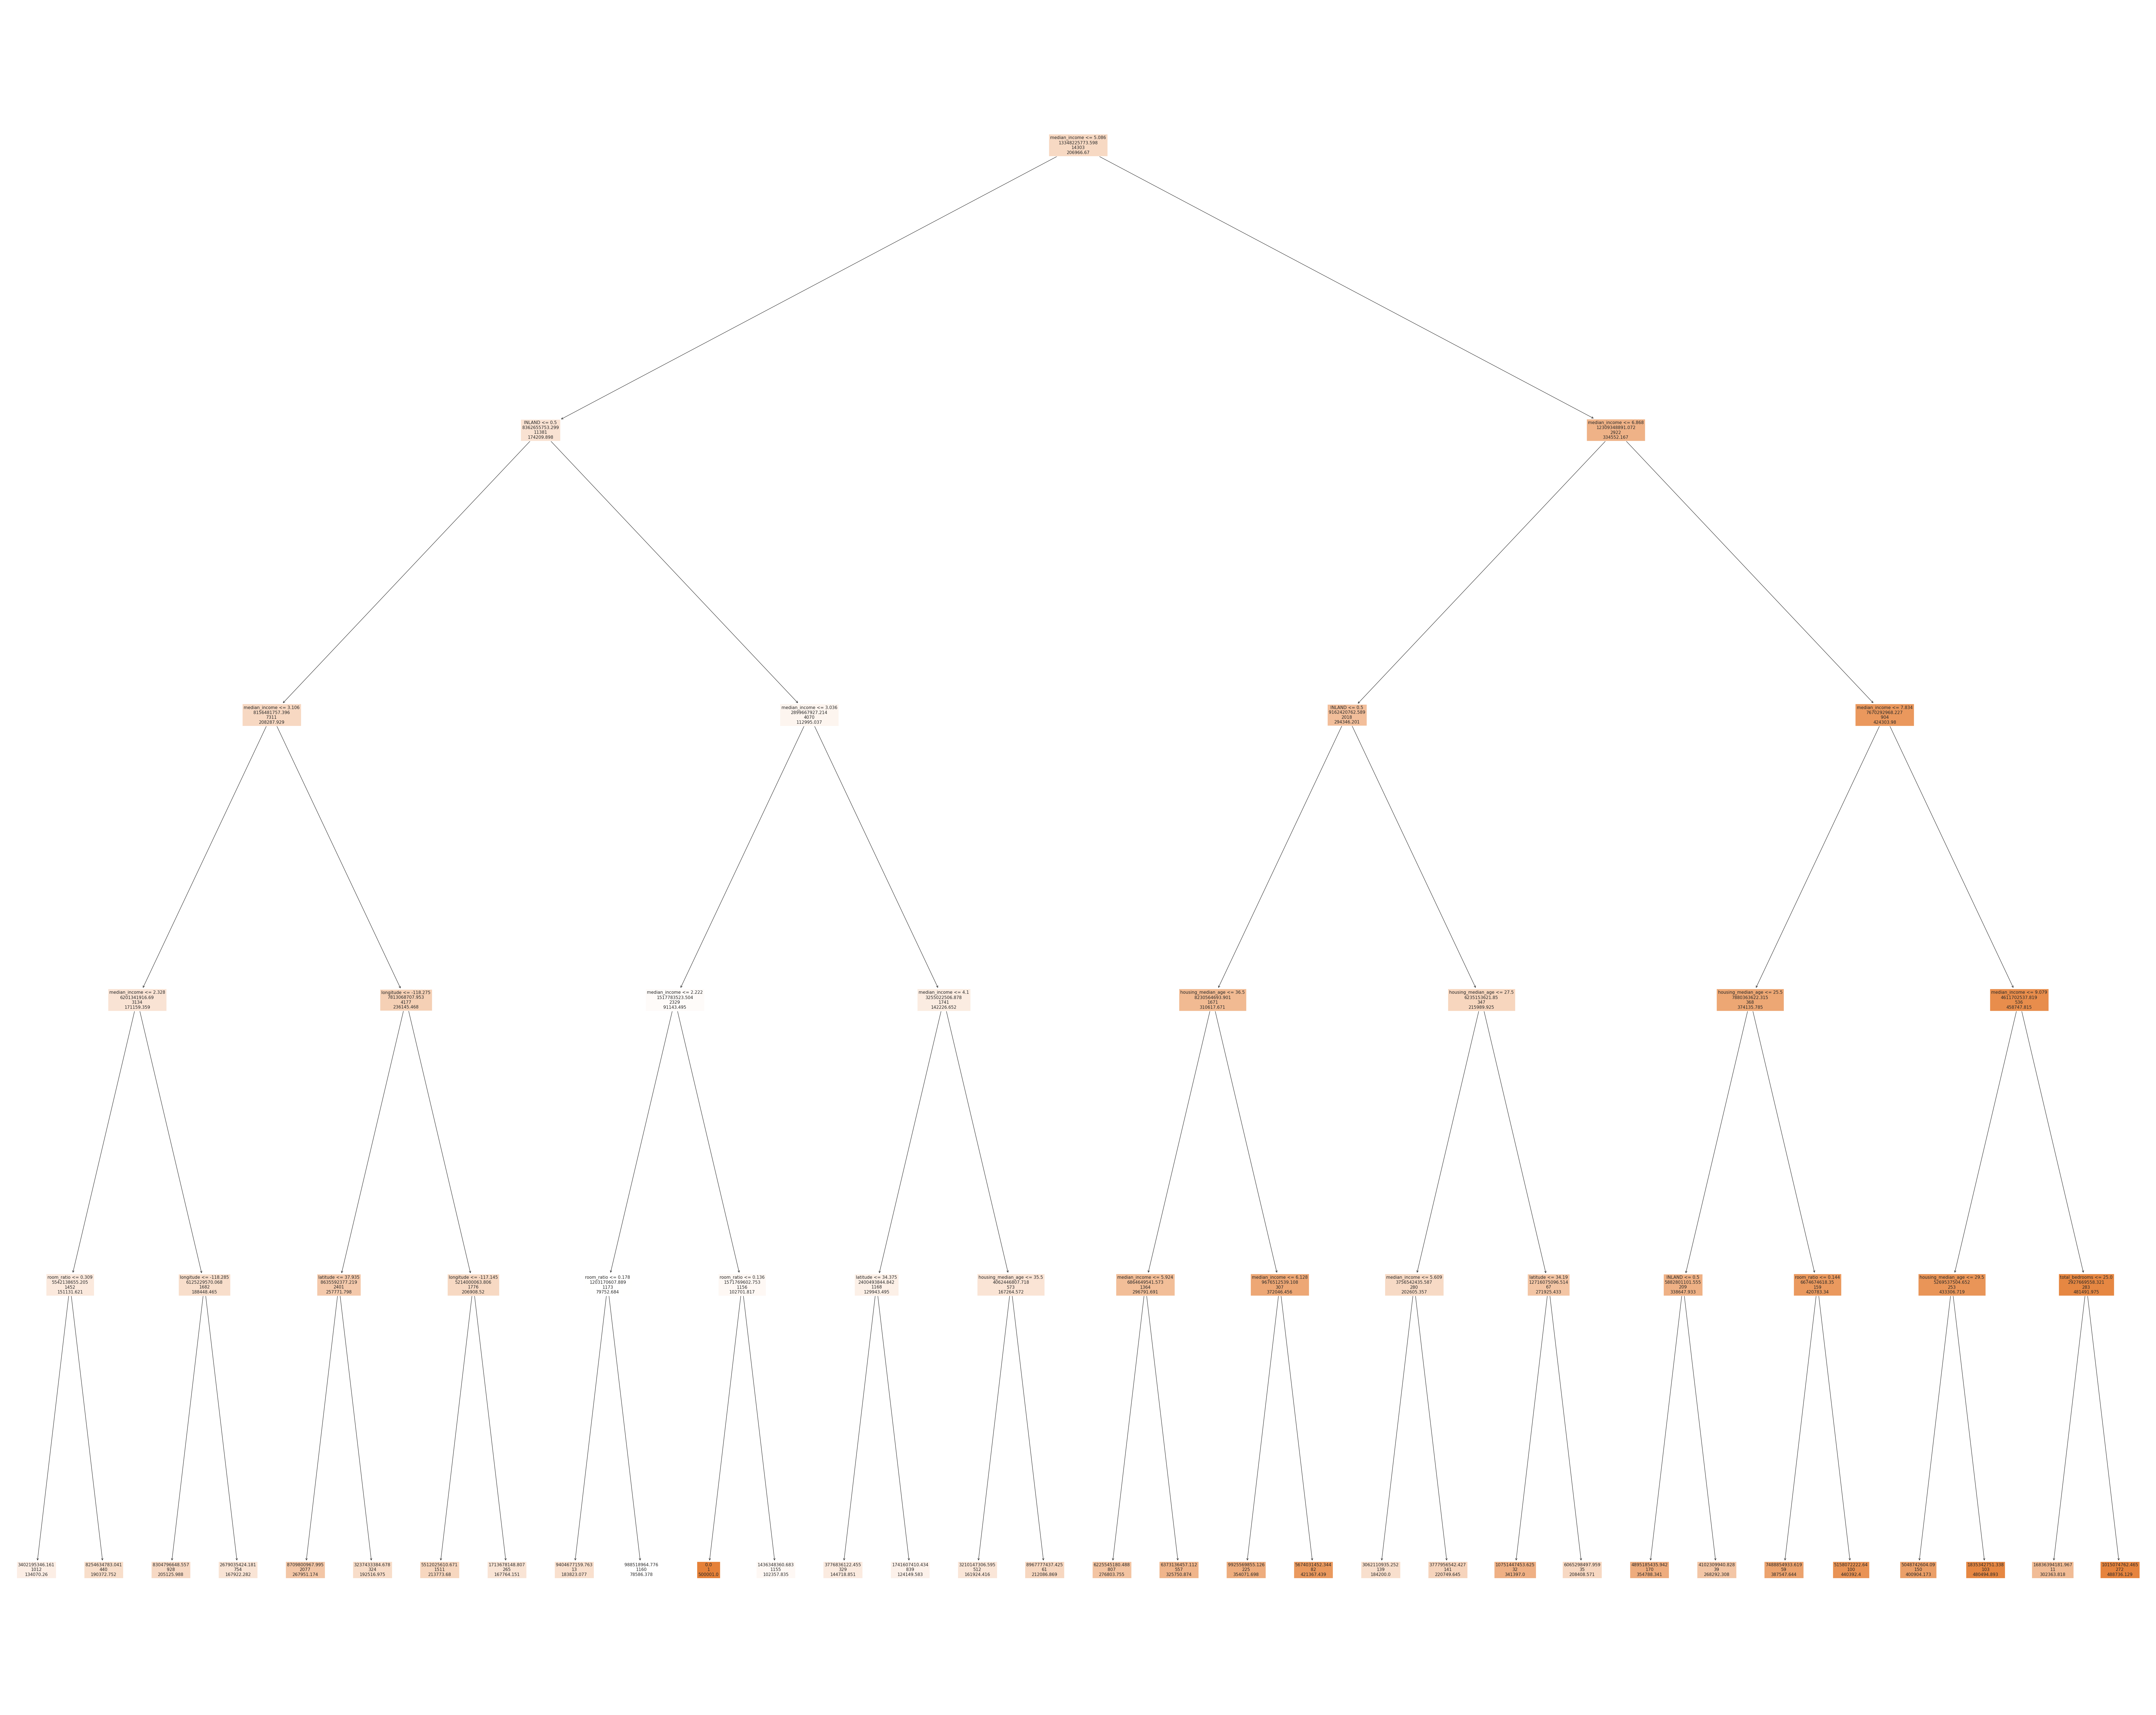

In [75]:
#graficar el modelo para ver la relacion entre las caracteristicas
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100,80))
plot_tree(
    modelo,
    feature_names = X_train.columns,
    filled=True, label="None"
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error( y_test, predicciones )

mse = np.sqrt(mse)

mse


68611.7471554928

In [ ]:
# Escalamiento
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_esc = scaler.fit_transform(X_train)
X_test_esc = scaler.fit_transform(X_test)

pd.DataFrame(X_train_esc)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.386010,1.102238,-0.926778,-0.050986,-0.028970,-0.353296,-0.010553,-0.988190,-0.892226,1.469857,-0.017492,-0.354732,-0.383625,-0.087530
1,-1.429626,1.013212,1.862100,-0.626817,-0.163899,-0.466063,-0.114956,-0.910856,-0.892226,-0.680338,-0.017492,2.819026,-0.383625,2.777393
2,-1.284818,0.858588,0.666867,-0.157036,-0.488201,-0.432845,-0.438606,1.513634,-0.892226,-0.680338,-0.017492,2.819026,-0.383625,-1.178367
3,-0.965242,1.345888,-0.209637,-0.490080,-0.561584,-0.386514,-0.522129,-0.640691,-0.892226,1.469857,-0.017492,-0.354732,-0.383625,-0.339092
4,-1.349732,1.050697,1.862100,0.385400,0.695386,0.056684,0.767251,-0.511836,-0.892226,-0.680338,-0.017492,2.819026,-0.383625,0.430147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16341,0.567726,-0.757933,1.304325,-0.377260,-0.433756,-0.476553,-0.336813,0.617854,1.120793,-0.680338,-0.017492,-0.354732,-0.383625,-0.284971
16342,0.722521,-0.875072,-1.086142,-0.033386,0.648042,-0.562220,-0.060144,0.811533,-0.892226,-0.680338,-0.017492,-0.354732,2.606712,1.778247
16343,-0.011506,0.230722,-0.608049,-0.288358,-0.362741,-0.027235,-0.266341,-0.876244,-0.892226,1.469857,-0.017492,-0.354732,-0.383625,-0.359871
16344,1.231846,-1.367057,-1.086142,-0.800559,-0.760426,-0.473056,-0.741375,-1.278337,-0.892226,-0.680338,-0.017492,-0.354732,2.606712,0.633576
